# Projeto: Data-Driven Insights

Este projeto tem como objetivo explorar, transformar e visualizar uma base de dados utilizando Python e bibliotecas como pandas, NumPy e Matplotlib.

A base escolhida contém registros de vendas com diversas informações: pedidos, produtos, preços, clientes e localizações.

Vamos analisar os dados e gerar insights relevantes para negócios.

# Importando bibliotecas e lendo arquivo
Utilizamos a base de dados de vendas e, para garantir a codificação correta das informações (acentos, moedas, datas, etc), utilizamos o encoding Latin-1 por ser comumente usado em idiomas da Europa  Ocidental

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


# Carregando Dados

Analisando os comandos podemos ver que temos 3 tipos principais de dados: *int64, float64, object*; que são, respectivamente: **int**, **float** e **string**.



In [79]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
df.head() #visualização das primeiras 5 linhas

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


Ooptamos pelo uso do *.info()* porque esse método retorna um resumo bem completo sobre a base de informações. Podemos analisar o índice, a quantidade de colunas, o tipo de cada dado, e mais.

In [80]:
df.info() #retorna o nome, tipos e quantidade de linhas e colunas (2823, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# Estruturas de dados
Utilizamos as estruturas de dados mais famosas em Python para armazenar e acessar informações do banco de dados:

In [ ]:
#lista com todos os valores da coluna 'PRODUCTLINE'
print('LISTA DOS PRODUTOS:')
lista_produtos = list(df['PRODUCTLINE'])
for produto in lista_produtos[:5]: #imprimindo apenas os 5 primeiros
    print(produto)

print('\nLISTA DOS PRODUTOS SEM REPETIÇÃO:')
#utilizando a função set() para evitar produtos repetidos
lista_sem_repeticao =list(set(df['PRODUCTLINE']))
for produto in lista_sem_repeticao: #exibe produtos sem repetir
    print(produto)

print('-~'*30) #separador básico para visualizar melhor

#'PRODUCTLINE' como chave e 'CUSTOMERNAME' como valor
print('\nTELEFONE DE CADA CLIENTE')
dicionario = dict(zip(df['CUSTOMERNAME'], df['PHONE']))
for chave, valor in list(dicionario.items())[:3]: #imprimindo apenas os 3 primeiros
    print(f'{chave}: {valor}')

print('-~'*30,'\n') #separador

#utilizando tupla para buscar os dados de um cliente
cliente_2 = df.iloc[3] #cliente na posição 3
#dizendo: traga o nome do cliente, seu telefone e sua cidade
dados_cliente_2 = (cliente_2['CUSTOMERNAME'], cliente_2['PHONE'], cliente_2['CITY'])
print('DADOS DO CLIENTE:')
print(dados_cliente_2)

Em Python, *zip()* é uma função integrada que combina elementos de duas ou mais sequências iteráveis em um objeto iterável de tuplas. É útil para iterar sobre múltiplas sequências em paralelo.

Praticamos o uso de estrutura de dados com objetivos reais, usando para identificar informações de clientes, como nome, telefone, cidade, e até usando para criar uma lista organizada de todos os produtos presentes na base de dados.

# Estruturas Condicionais
Em Python *if, elif e else* são estruturas condicionais que permitem executar blocos de código diferentes com base em condições lógicas. São essenciais para tomada de decisão em programas. Já for e while são estruturas de repetição (ou laços) que permitem percorrer elementos ou executar ações repetidamente até que uma condição seja satisfeita. A formatação .2f é usada para exibir números com duas casas decimais, muito útil em valores monetários.

Praticamos o uso dessas estruturas aplicadas a dados reais, classificando uma venda como alta, média ou baixa com base no valor. Utilizamos um laço for para somar os cinco primeiros valores da coluna de vendas e um while para encontrar a primeira venda acima de R$ 10.000. Essa abordagem mostra como estruturas básicas da linguagem podem ser combinadas para extrair informações valiosas de uma base de dados de forma clara e eficiente.

In [ ]:
coluna_escolhida = df['SALES']
valor = coluna_escolhida.iloc[2] #variavel a ser analisada

#classificando o valor da venda
if valor > 8000:
    print(f"Venda de alto valor: R${valor:.2f}\n")
elif valor > 3000:
    print(f"Venda de valor médio: R${valor:.2f}\n")
else:
    print(f"Venda de baixo valor: R${valor:.2f}\n")

#usando for para somar os 5 primeiros valores da coluna
soma = 0
for valor in range(5):
    soma += coluna_escolhida.iloc[valor]
print(f"Soma dos 5 primeiros: R${soma:,.2f}\n")

#encontrando o primeiro valor acima de 10k
indice = 0
while indice < len(coluna_escolhida):
    if coluna_escolhida.iloc[indice] > 10000:
        print('VENDAS ACIMA DE 10 MIL:')
        print(f"Primeiro valor acima -> R${coluna_escolhida.iloc[indice]:,.2f}")
        #função para trazer a quantidade total de vendas acima de 10 mil
        print(f"Número total de vendas nessa faixa ->", (df['SALES'] > 10000).sum())
        break
    indice += 1

A maioria das vendas analisadas nos primeiros registros é de valor médio a alto, e o fato de encontrarmos uma venda acima de R$ 10.000 logo no início da base sugere que vendas de alto valor são frequentes. A soma das cinco primeiras vendas já resulta em um montante expressivo, o que indica que poucos pedidos podem representar uma grande fatia da receita total.

# Operações e Manipulação de dados
Utilizamos os conhecimentos adquiridos para inserir uma nova coluna no df e realizamos descontos e média.


In [57]:
#criando nova coluna no df com desconto de 10%
df['DISCOUNT'] = df['PRICEEACH'] * 0.9
df['DIFFERENCEBETWEEN'] = df['PRICEEACH'] - df['DISCOUNT']
print(df[['PRICEEACH', 'DISCOUNT', 'DIFFERENCEBETWEEN']].head()) #imprimindo em Series apenas as 5 linhas iniciais

media_desconto = df['DIFFERENCEBETWEEN'].mean()
print(f"Média de desconto aplicado: R$ {media_desconto:.2f}\n") #descobrindo o desconto médio

media_por_categoria = df.groupby('PRODUCTLINE')['DIFFERENCEBETWEEN'].mean().round(2)
print(media_por_categoria)



   PRICEEACH  DISCOUNT  DIFFERENCEBETWEEN
0      95.70    86.130              9.570
1      81.35    73.215              8.135
2      94.74    85.266              9.474
3      83.26    74.934              8.326
4     100.00    90.000             10.000
Média de desconto aplicado: R$ 8.37

PRODUCTLINE
Classic Cars        8.73
Motorcycles         8.30
Planes              8.17
Ships               8.39
Trains              7.57
Trucks and Buses    8.75
Vintage Cars        7.81
Name: DIFFERENCEBETWEEN, dtype: float64 



Com um desconto de 10% aplicado aos preços unitários, a média de valor concedido por item foi de aproximadamente R$ 8,37. Isso permite estimar o impacto financeiro de uma campanha promocional de 10%, além de ajudar a avaliar se o valor concedido compensa em relação ao volume de vendas gerado.

Algumas categorias apresentaram descontos médios significativamente maiores, o que pode indicar produtos com preços unitários mais elevados ou maior margem. Essas categorias podem ser estratégicas para campanhas de desconto, pois mesmo com concessão maior, ainda há espaço para lucro.

# NumPy e arrays numéricos

In [66]:
array = np.array(df['QUANTITYORDERED'])

print(array[:5])                              #primeiros valores
print(array + 10)                             #soma 10 a todos os valores
print(array ** 2)                             #quadrado de cada valor
print(f"Soma: {array.sum():,.2f}")         #soma total
print(f"Média: {array.mean():.2f}")         #média

[30 34 41 45 49]
[40 44 51 ... 53 44 57]
[ 900 1156 1681 ... 1849 1156 2209]
Soma: 99,067.00
Média: 35.09


A quantidade total de produtos pedidos ao longo do período analisado mostra um volume significativo, indicando forte demanda. A média de itens por pedido sugere que os clientes tendem a comprar 35 unidades por vez, o que pode orientar decisões de estoque, embalagens e promoções.

# Acesso e Manipulação de Dados com Pandas


In [76]:
vendas_altas = df.loc[df['QUANTITYORDERED'] > 60, ['CUSTOMERNAME', 'QUANTITYORDERED', 'PRODUCTLINE']]
print(vendas_altas.head(), '\n') #analisando vendas acima de 60 unidades

categoria_mais_vendida = vendas_altas['PRODUCTLINE'].value_counts()
print(categoria_mais_vendida, '\n') #verificando quais categorias aparecem mais

vendas_por_categoria = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

#formata os valores da Series para o formato de moeda R$
vendas_por_categoria_formatada = vendas_por_categoria.apply(lambda x: f"R$ {x:,.2f}")

print("Total de vendas por categoria:")
print(vendas_por_categoria_formatada)

                  CUSTOMERNAME  QUANTITYORDERED   PRODUCTLINE
25       Euro Shopping Channel               66   Motorcycles
104      UK Collectables, Ltd.               66   Motorcycles
131  The Sharp Gifts Warehouse               64  Classic Cars
264      UK Collectables, Ltd.               66   Motorcycles
418                Mini Caravy               97  Classic Cars 

PRODUCTLINE
Classic Cars        10
Vintage Cars         4
Motorcycles          3
Planes               3
Trucks and Buses     1
Name: count, dtype: int64 

Total de vendas por categoria:
PRODUCTLINE
Classic Cars        R$ 3,919,615.66
Vintage Cars        R$ 1,903,150.84
Motorcycles         R$ 1,166,388.34
Trucks and Buses    R$ 1,127,789.84
Planes                R$ 975,003.57
Ships                 R$ 714,437.13
Trains                R$ 226,243.47
Name: SALES, dtype: object


Filtrando as vendas com quantidade superior a 60 unidades, percebemos que essas transações são pouco comuns, mas fortemente concentradas em categorias como Classic Cars e Vintage Cars. Esse padrão pode indicar que esses produtos são mais populares em grandes pedidos, talvez destinados a revenda ou ações promocionais. Além disso, o total de vendas confirma que Classic Cars domina tanto em frequência quanto em valor, sendo uma linha altamente estratégica para o negócio.

# Gráficos

### Gráfico de barras 📊

Utilizamos o gráfico de barras para comparar o total de vendas por categoria de produto e percebemos que algumas linhas são significativamente mais lucrativas do que outras. A categoria com maior receita, provavelmente relacionada a itens de alto valor agregado ou com maior volume de vendas, representa uma oportunidade de investimento e foco comercial. Por outro lado, o segundo gráfico mostra as 10 cidades com maior quantidade de vendas, revelando onde há maior volume de pedidos. Isso indica alta demanda nessas regiões, o que pode orientar decisões sobre estoque, logística e marketing.

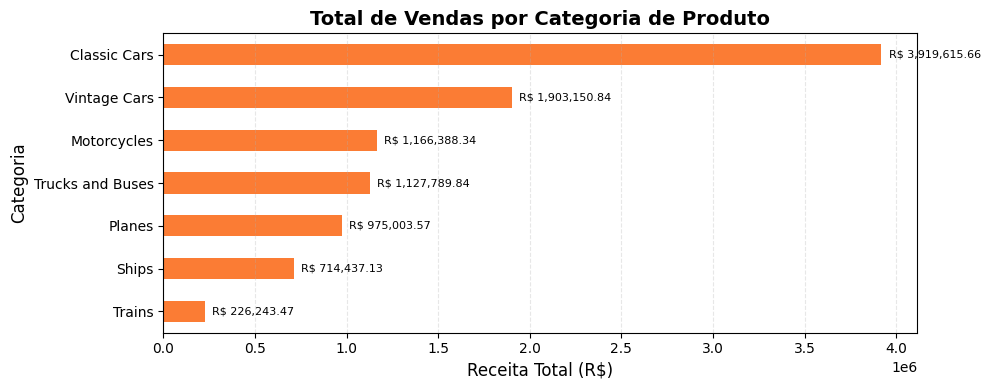

In [ ]:
#ordenando os dados de forma decrescente
vendas = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=True)

#criação de barras horizontal
plt.figure(figsize=(10,4))
ax = vendas.plot(kind='barh', color='#fb7c34')  #laranja

#adicionando as legendas
for posicao, valor in enumerate(vendas):
    ax.text(valor + vendas.max()*0.01, posicao, f'R$ {valor:,.2f}', va='center', fontsize=8, color='black')

#títulos e eixos
plt.title('Total de Vendas por Categoria de Produto', fontsize=14, fontweight='bold')
plt.xlabel('Receita Total (R$)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)

#detalhes do fundo
plt.grid(axis='x', linestyle='--', alpha=0.3) #grade leve
plt.tight_layout() #ajustando o espaçamento
plt.show() #exibindo

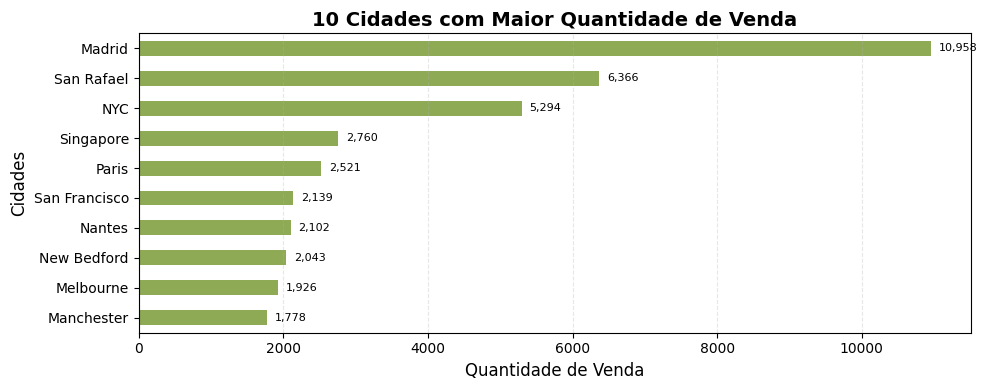

In [ ]:
#ordenando os dados de forma crescente
vendas = df.groupby('CITY')['QUANTITYORDERED'].sum().sort_values(ascending=True)

# Selecionar as 10 primeiras cidades com maiores vendas
top_10_cidades = vendas.tail(10)

#criação de barras horizontal
plt.figure(figsize=(10,4))
ax = top_10_cidades.plot(kind='barh', color='#8eaa55')

#adicionando as legendas
for posicao, valor in enumerate(top_10_cidades):
    ax.text(valor + top_10_cidades.max()*0.01, posicao, f'{valor:,.0f}', va='center', fontsize=8, color='black')


#títulos e eixos
plt.title('10 Cidades com Maior Quantidade de Venda', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Venda', fontsize=12)
plt.ylabel('Cidades', fontsize=12)


#detalhes do fundo
plt.grid(axis='x', linestyle='--', alpha=0.3) #grade leve
plt.tight_layout() #ajustando o espaçamento
plt.show() #exibindo

### Gráfico de linha 📈
Utilizando um gráfico de linha para cada ano registrado na base de dados pudemos observar uma variação significativa nas vendas ao longo dos meses. Houve picos notáveis de faturamento em determinados períodos do ano, indicando possíveis sazonalidades ou campanhas promocionais de sucesso. Essa tendência pode ser explorada para planejar ações comerciais mais estratégicas em meses de maior retorno.

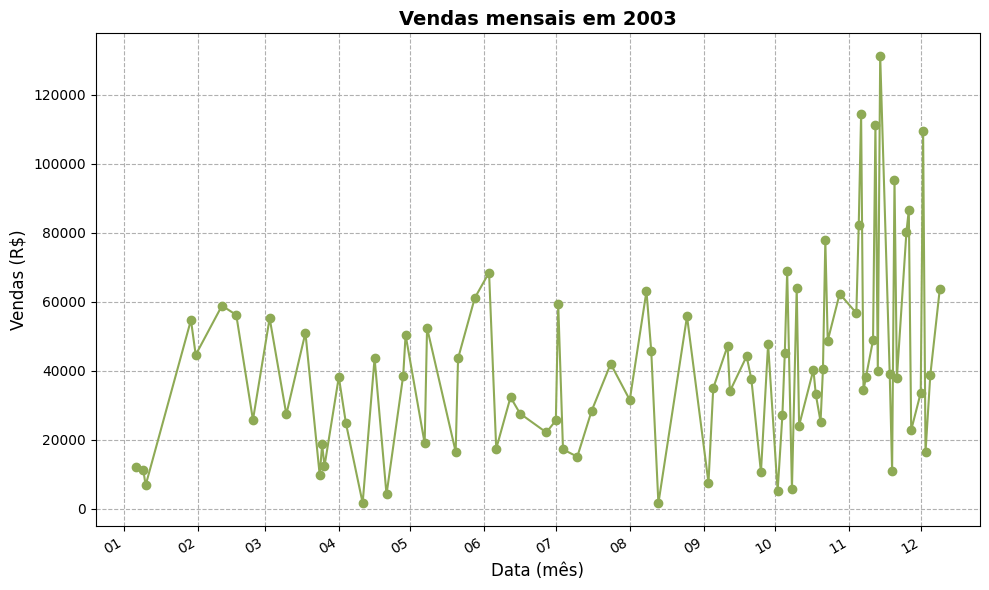

In [ ]:
#filtro do ano de 2003
df_2003 = df[df['YEAR_ID'] == 2003].copy()
df_2003['ORDERDATE'] = pd.to_datetime(df_2003['ORDERDATE'], errors='coerce') #evitando erros
vendas_2003 = df_2003.groupby(df_2003['ORDERDATE'])['SALES'].sum() #somando vendas

#criação do grafico
plt.figure(figsize=(10, 6))
vendas_2003.plot(kind='line', color='#8eaa55', marker='o')

#formatando os rótulos do eixo X para mostrar apenas o mês
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator()) #resultados mes a mes

#títulos e eixos
plt.title('Vendas mensais em 2003', fontsize=14, fontweight='bold')
plt.xlabel('Data (mês)', fontsize=12)
plt.ylabel('Vendas (R$)', fontsize=12)

#detalhes do fundo
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

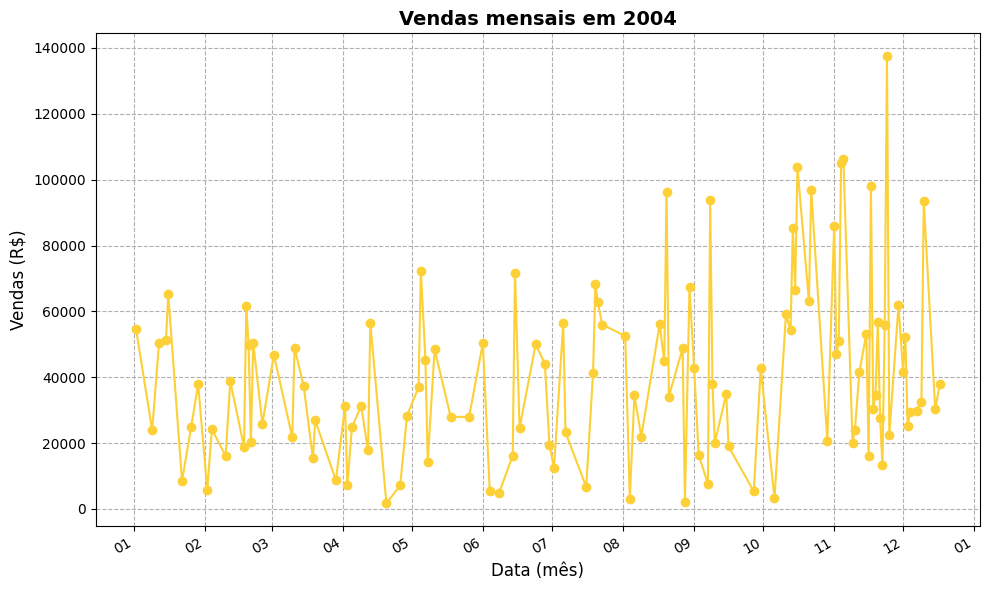

In [ ]:
#filtro do ano de 2004
df_2004 = df[df['YEAR_ID'] == 2004].copy()
df_2004['ORDERDATE'] = pd.to_datetime(df_2004['ORDERDATE'], errors='coerce') #evitando erros
vendas_2004 = df_2004.groupby(df_2004['ORDERDATE'])['SALES'].sum() #somando vendas

#criação do grafico
plt.figure(figsize=(10, 6))
vendas_2004.plot(kind='line', color='#fcd036', marker='o')

#formatando os rótulos do eixo X para mostrar apenas o mês
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator()) #resultados mes a mes

#títulos e eixos
plt.title('Vendas mensais em 2004', fontsize=14, fontweight='bold')
plt.xlabel('Data (mês)', fontsize=12)
plt.ylabel('Vendas (R$)', fontsize=12)

#detalhes do fundo
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

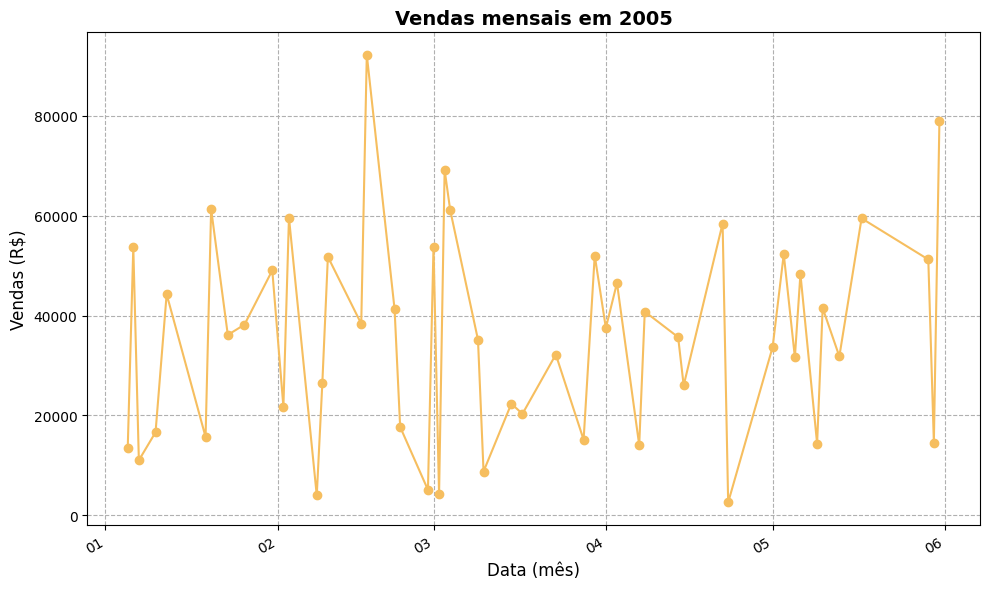

In [ ]:
#filtro do ano de 2005
df_2005 = df[df['YEAR_ID'] == 2005].copy()
df_2005['ORDERDATE'] = pd.to_datetime(df_2005['ORDERDATE'], errors='coerce') #evitando erros
vendas_2005 = df_2005.groupby(df_2005['ORDERDATE'])['SALES'].sum() #somando vendas

#criação do grafico
plt.figure(figsize=(10, 6))
vendas_2005.plot(kind='line', color='#f6be5f', marker='o')

#formatando os rótulos do eixo X para mostrar apenas o mês
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator()) #resultados mes a mes

#títulos e eixos
plt.title('Vendas mensais em 2005', fontsize=14, fontweight='bold')
plt.xlabel('Data (mês)', fontsize=12)
plt.ylabel('Vendas (R$)', fontsize=12)

#detalhes do fundo
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

### Grafico de dispersão ⚪

Atráves do gráfico de dispersão pudemos notar que pedidos de clientes de grande porte tendem a gerar maior valor de venda, mesmo com quantidades variadas. Já os clientes pequenos raramente alcançam altos valores totais, mesmo quando fazem pedidos grandes. Isso sugere que o tipo de cliente é um fator importante para estratégias comerciais.

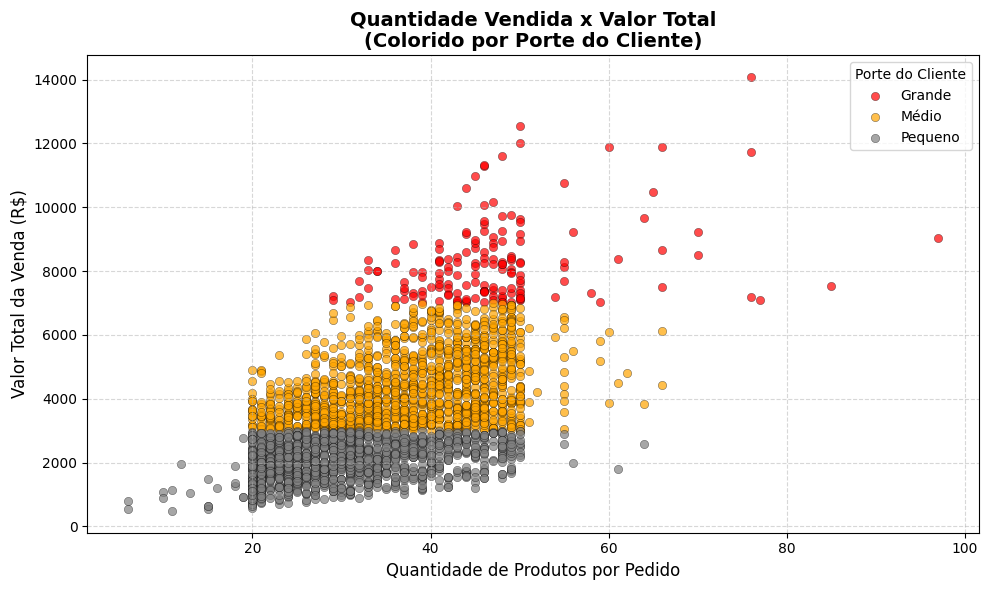

In [10]:
#definindo a paleta com cores fixas para cada categoria de acordo com o df
cores = {
    'Large': 'red',
    'Medium': 'orange',
    'Small': 'gray'
}
#traduzindo os valores do df 'DEALSIZE' para português
rotulos_portugues = {
    'Large': 'Grande',
    'Medium': 'Médio',
    'Small': 'Pequeno'
} #o objetivo é facilitar a leitura

#criando o gráfico
plt.figure(figsize=(10, 6))
for porte, cor in cores.items(): #laço que garante a cor de cada porte
    grupo = df[df['DEALSIZE'] == porte]
    plt.scatter(
        grupo['QUANTITYORDERED'],
        grupo['SALES'],
        color=cor,
        label=rotulos_portugues[porte], #usando o rótulo em português
        alpha=0.7,
        edgecolors='black',
        linewidths=0.3
)
#título e eixos
plt.title('Quantidade Vendida x Valor Total\n(Colorido por Porte do Cliente)', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Produtos por Pedido', fontsize=12)
plt.ylabel('Valor Total da Venda (R$)', fontsize=12)

plt.grid(linestyle='--', alpha=0.5) #grade leve
plt.legend(title='Porte do Cliente') #legenda

#ajuste e exibição
plt.tight_layout()
plt.show()

# Relatório  – Principais Aprendizados e Descobertas
Durante a análise da base *sales_data_sample.csv* com 2823 linhas e 25 colunas, foram realizadas diversas operações e visualizações:

- Listamos categorias de produtos, clientes e vendas por tipo.
- Utilizamos listas, dicionários e tuplas para estruturar informações.
- Aplicamos condições e laços (if, for, while) para entender padrões nos dados.
- Manipulamos colunas com pandas e criamos novas variáveis como "Desconto".
- Com NumPy, exploramos operações vetorizadas para somar, multiplicar e analisar séries numéricas.
- Utilizamos groupby e value_counts() para resumos por categoria e cidade.
- Criamos 3 tipos de gráficos:

📈 Linha: para evolução temporal das vendas

📊 Barras: para vendas por categoria e por cidade

⚪ Dispersão: para entender relação entre quantidade e preço/venda

### Insights:
- As categorias com maior volume de vendas foram Classic Cars e Motorcycles.
- Cidades como Madrid, Paris e San Francisco lideraram em quantidade vendida.
- Clientes de porte Large tendem a gerar vendas com maior valor total.
- O volume de vendas não está diretamente proporcional ao preço unitário — produtos baratos também geram grandes volumes.
- A maioria das vendas ocorre com quantidade média entre 20 e 50 produtos por pedido.

---

Este projeto demonstrou como aplicar fundamentos de Python e análise de dados para gerar relatórios claros e visuais, auxiliando em decisões comerciais.